<a href="https://colab.research.google.com/github/HimanshuSahoo/Python-for-Data-Scientist/blob/main/MyHyp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import statsmodels.api as sm
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [ ]:
import warnings
warnings.filterwarnings('ignore')

## 1. One Population Mean

### a. Population variance known

**Research Question**

A cartwheeling competition was organized for some adults. The data looks like following,

(80.57, 98.96, 85.28, 83.83, 69.94, 89.59, 91.09, 66.25, 91.21, 82.7 , 73.54, 81.99, 54.01, 82.89, 75.88, 98.32, 107.2 , 85.53, 79.08, 84.3 , 89.32, 86.35, 78.98, 92.26, 87.01)

Is the average cartwheel distance (in inches) for adults more than 80 inches?

**Population:** All adults
    
**Parameter of Interest:** $\mu$, population mean cartwheel distance.

**Null Hypothesis:** $\mu$ = 80

**Alternative Hypthosis:** $\mu$ > 80

**Data:** 25 adult participants ;
$\mu = 83.84$ ;
$\sigma = 10.72$

Note the argument alternative="larger" indicating a one-sided test. The function returns two values - the z-statistic and the corresponding p-value.

In [ ]:
cwdata = np.array([80.57, 98.96, 85.28, 83.83, 69.94, 89.59, 91.09, 66.25, 91.21, 82.7 , 73.54, 81.99, 54.01, 
                 82.89, 75.88, 98.32, 107.2 , 85.53, 79.08, 84.3 , 89.32, 86.35, 78.98, 92.26, 87.01])

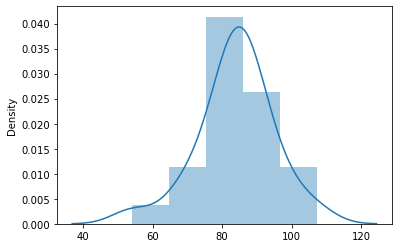

In [ ]:
## We can also plot the histogram of the data 
## to check if it approximately follows a Normal distribution.
sns.distplot(cwdata,bins=5)
plt.show()

In [ ]:
sm.stats.ztest(cwdata, value = 80, alternative = "larger")

(1.756973189172546, 0.039461189601168366)

**Conclusion**

Since the p-value (0.0394) is lower than the standard significance level 0.05, we can reject the Null hypothesis that the mean cartwheel distance for adults (a population quantity) is equal to 80 inches. There is strong evidence in support for the alternatine hypothesis that the mean cartwheel distance is, in fact, higher than 80 inches. 

### b. Population variance unknown

You want to test an American citizen's claim that the average height of an American is 175.3 cm. Measure the heights of ten American males  and use the T-test to determine if the American’s claim is true.

In [ ]:
# 1-sample t-test
one_sample_data = [177.3, 182.7, 169.6, 176.3, 180.3, 179.4, 178.5, 177.2, 181.8, 176.5]

t_stat, pval = stats.ttest_1samp(one_sample_data, 175.3)

print ("The t-statistic is ", t_stat," and the p-value is ",pval)

The t-statistic is  2.295568968083183  and the p-value is  0.04734137339747034


Conclusion

Since the p-value (0.0473) is lower than the standard significance level 0.05, we can reject the Null hypothesis that the mean height for adults (a population quantity) is equal to 175.3 cms. There is some evidence in support for the alternatine hypothesis that the mean height is, in fact, different from 175.3 cm. 


## 2. Difference in Population Means

**Research Question**

Considering adults in the NHANES data, do males have a significantly higher mean Body Mass Index than females?

**Population:** Adults in the NHANES data.

**Parameter of Interest:** $\mu_1 - \mu_2$, Body Mass Index.

**Null Hypothesis:** $\mu_1 = \mu_2$

**Alternative Hypthosis:** $\mu_1 \neq \mu_2$

**Data:**

2976 Females; $\mu_1 = 29.94$ ;
$\sigma_1 = 7.75$

2759 Male Adults;
$\mu_2 = 28.78$;
$\sigma_2 = 6.25$

$\mu_1 - \mu_2 = 1.16$



In [ ]:
bmi_data = pd.read_csv('bmi_data.csv')
bmi_data.head()

,GENDER,BMI
0,1,27.8
1,1,30.8
2,1,28.8
3,2,42.4
4,2,20.3


In [ ]:
females = bmi_data[bmi_data["GENDER"] == 2]
males = bmi_data[bmi_data["GENDER"] == 1]

In [ ]:
## Run the test
sm.stats.ztest(females["BMI"].dropna(), males["BMI"].dropna(), alternative='two-sided')

(6.1755933531383205, 6.591544431126401e-10)

**Conclusion of the hypothesis test**

Since the p-value (6.59e-10) is extremely small, we can reject the Null hypothesis that the mean BMI of males is same as that of females. Note, we used alternative="two-sided" in the z-test because here we are checking for inequality.



## One Population Proportion

**Research Question**

In previous years, 52% of parents believed that electronics and social media was the cause of their teenager’s lack of sleep. Do more parents today believe that their teenager’s lack of sleep is caused due to electronics and social media?

**Population:** Parents with a teenager (age 13-18)

**Parameter of Interest:** p

**Null Hypothesis:** p = 0.52

**Alternative Hypthosis:** p > 0.52 (note that this is a one-sided test)

**Data:** 1018 people were surveyed. 56% of those who were surveyed believe that their teenager’s lack of sleep is caused due to electronics and social media.



In [ ]:
n = 1018
pnull = .52
phat = .56

In [ ]:
sm.stats.proportions_ztest(phat * n, n, pnull, alternative='larger')

(2.571067795759113, 0.005069273865860533)

**Conclusion of the hypothesis test**

Since the calculated p-value of the z-test is pretty small, we can reject the Null hypothesis that the percentage of parents, who believe that their teenager’s lack of sleep is caused due to electronics and social media, is as same as previous years' estimate i.e. 52%.



## Difference in Population Proportions

**Research Question**

Is there a significant difference between the population proportions of parents of black children and parents of Hispanic children who report that their child has had some swimming lessons?

**Populations:** All parents of black children age 6-18 and all parents of Hispanic children age 6-18

**Parameter of Interest:** p1 - p2, where p1 = black and p2 = hispanic

**Null Hypothesis:** p1 - p2 = 0

**Alternative Hypthosis:** p1 - p2 $\neq$ = 0

**Data:** 247 Parents of Black Children. 36.8% of parents report that their child has had some swimming lessons.
308 Parents of Hispanic Children. 38.9% of parents report that their child has had some swimming lessons.



In [ ]:
n1 = 247
p1 = .37

n2 = 308
p2 = .39

#population1 = np.random.binomial(1, p1, n1)
#population2 = np.random.binomial(1, p2, n2)

In [ ]:
#sm.stats.ttest_ind(population1, population2)

In [ ]:
sample_success_a, sample_size_a = (.37*247, 247)
sample_success_b, sample_size_b = (0.39*308, 308)


successes = np.array([sample_success_a, sample_success_b])
samples = np.array([sample_size_a, sample_size_b])


In [ ]:
samples

array([247, 308])

In [ ]:
stat, p_value = sm.stats.proportions_ztest(count=successes, nobs=samples, alternative='two-sided')

In [ ]:
stat, p_value

(-0.4821451700126961, 0.6297028238097944)

**Conclusion of the hypothesis test**

Since the p-value is quite high ~0.629, we cannot reject the Null hypothesis in this case i.e. the difference in the population proportions are not statistically significant.



## ANOVA

In [ ]:
df = pd.read_csv('diet.csv')

In [ ]:
df

,Atkins,GM,South Beach
0,6,4,6
1,2,4,7
2,3,5,5
3,4,7,6
4,2,8,8
5,3,5,7
6,3,3,8
7,2,7,9
8,7,10,6
9,8,4,5


In [ ]:
stats.f_oneway(df.iloc[:,0], df.iloc[:,1],df.iloc[:,2])


F_onewayResult(statistic=3.5714285714285716, pvalue=0.039440588798258305)

Conclusion

Since the p-value (.03944) is less than 0.05, we reject the null hypothesis. This means we can say that there is significant difference in the effects produced by the different diets.

## Chi Square - Goodness of Fit

A shop owner claims that an equal number of customers come into his shop each weekday. To test this hypothesis, a researcher records the number of customers that come into the shop in a given week and finds the following:

Monday: 50 customers
Tuesday: 60 customers
Wednesday: 40 customers
Thursday: 47 customers
Friday: 53 customers

We will use **chisquare(f_obs, f_exp)** for the test


In [ ]:
expected = [50, 50, 50, 50, 50]
observed = [50, 60, 40, 47, 53]

In [ ]:
stats.chisquare(f_obs=observed, f_exp=expected)

Power_divergenceResult(statistic=4.359999999999999, pvalue=0.3594720674366307)

**Conclusion**

Since the p-value (.35947) is not less than 0.05, we fail to reject the null hypothesis. This means we do not have sufficient evidence to say that the true distribution of customers is different from the distribution that the shop owner claimed.



## Chi Square - Test of Independence

Does interest in a specific subject depend on gender
H0 - Independent ; Ha: Dependent

        Science,	Math,	Art
Male         20,      30,    15
Female       20,      15,    30

In [ ]:
# chi-squared test 
from scipy.stats import chi2_contingency

In [ ]:
# contingency table
table = [[10, 20, 30],
[6,  9,  17]]
print(table)

[[10, 20, 30], [6, 9, 17]]


In [ ]:
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(p)

dof=2
0.873028283380073


In [ ]:
# interpret p-value
alpha = 0.05
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

significance=0.050, p=0.873
Independent (fail to reject H0)
